### Import all the neccessary libraries

In [63]:
# Importing libraries 

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns
import time
from IPython.display import display
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

%matplotlib inline 

### Read the Data Set (provide the correct path)

In [2]:
# Read the dataset using pandas pd.read_csv and display the first two rows

data = pd.read_csv('dataset.csv', index_col = 'Id')
pd.set_option('display.max_columns', None)
display(data.head(2))

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


### Data Exploration

In [3]:
print("\n[INFO]:\n")
print("\nDimensions of the dataset is:",data.shape)
#no_of_observations will be no. of observation and no_of_features will be features including 1 target variable
no_of_observations, no_of_features = data.shape
print("\nDatatypes of Features:\n\n",data.dtypes)


[INFO]:


Dimensions of the dataset is: (15120, 55)

Datatypes of Features:

 Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int

In [4]:
print("\nOBSERVATIONS!!!\n")
print('\nDataset contains ', no_of_observations, ' number of observations & ', no_of_features-1, ' features to predict forest cover type!!!!') 
print("\nAll the features are integer values and hence there is no need to do any convertion!!!!\n")


OBSERVATIONS!!!


Dataset contains  15120  number of observations &  54  features to predict forest cover type!!!!

All the features are integer values and hence there is no need to do any convertion!!!!



### Skewness 

In [5]:
# Compute Skew of each feature
print(data.skew())

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

In [6]:
print("OBSERVATIONS!!!!!")
print("\nSoil_Type8 and Soil_Type25 has the highest skew, POSITIVE SKEW!!!!")
print("\nHillshade is negatively skewed!!!!")

OBSERVATIONS!!!!!

Soil_Type8 and Soil_Type25 has the highest skew, POSITIVE SKEW!!!!

Hillshade is negatively skewed!!!!


### Feature Statistics:-
##### Split the data into two parts - numerical features and binary features of data. Target Variable is excluded 

In [7]:
pd.set_option('display.max_columns', None)

# Extract all numerical features from data
numerical_features = data.iloc[:,:10]

# Extract all binary features from data
binary_features = data.iloc[:,10:-1]

# Numerical Features Statistics:
numerical_features.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


In [8]:
print("\nOBSERVATIONS!!!\n")
print("\nMean of the features varies from a low value of 16.50 to as high as 2749.32.")
print("\nHorizontal_Distance_To_Roadways is the most spread out data followed by Horizontal_Distance_To_Fire_Points and Elevation. ")
print("\nThe most densed and near to mean is Slope followed by all 3 features of Hillshade")
print("\nAll the features have minimum value = 0 except Elevation and Vertical_Distance_To_Hydrology features")
print("\nElevation has the highest minimum value = 1863 and Vertical_Distance_To_Hydrology has the lowest = -146")


OBSERVATIONS!!!


Mean of the features varies from a low value of 16.50 to as high as 2749.32.

Horizontal_Distance_To_Roadways is the most spread out data followed by Horizontal_Distance_To_Fire_Points and Elevation. 

The most densed and near to mean is Slope followed by all 3 features of Hillshade

All the features have minimum value = 0 except Elevation and Vertical_Distance_To_Hydrology features

Elevation has the highest minimum value = 1863 and Vertical_Distance_To_Hydrology has the lowest = -146


In [9]:
# Binary/ Categorical Feature Statistics
display(binary_features.describe())

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357
std,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
print("\nOBSERVATIONS!!!\n")
print("\nWilderness_Area and Soil_Type are one hot encoded, all the values are 0 or 1!!!!\n")
print("\nFeatures:- Soil_Type7 & Soil_Type15 Can be removed as they are constant!!!!\n")
print("\nWilderness_Area3 has the highest mean followed by Wilderness_Area4 and Wilderness_Area1\n")
print("\nMost Obeservations will have features either Wilderness_Area3/4/1")
print("\nScales of each features are different and hence rescaling and standardization are requried!!!\n")



OBSERVATIONS!!!


Wilderness_Area and Soil_Type are one hot encoded, all the values are 0 or 1!!!!


Features:- Soil_Type7 & Soil_Type15 Can be removed as they are constant!!!!


Wilderness_Area3 has the highest mean followed by Wilderness_Area4 and Wilderness_Area1


Most Obeservations will have features either Wilderness_Area3/4/1

Scales of each features are different and hence rescaling and standardization are requried!!!



### Frequency distribution of Wilderness area 

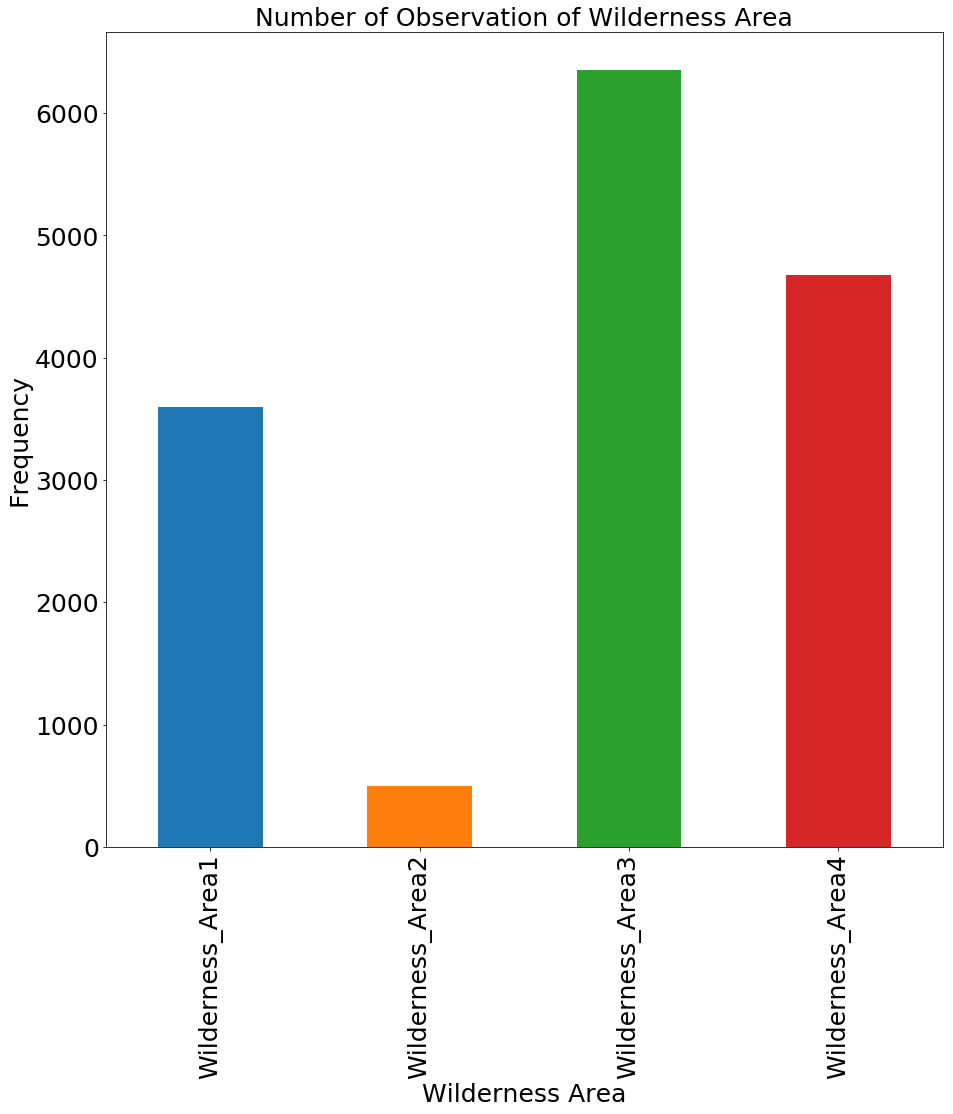

In [11]:
plt.figure(figsize = (15,15))
# Extract the wilderness and soil data into two separate variable
Data_wilderness = binary_features.iloc[:,:4]
# Create a bar plot
Data_wilderness.sum().plot(kind='bar')
plt.title("Number of Observation of Wilderness Area", size = 25)
plt.xlabel("Wilderness Area", size = 25)
plt.ylabel("Frequency", size = 25)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.show()

### Frequency distribution of Soil type

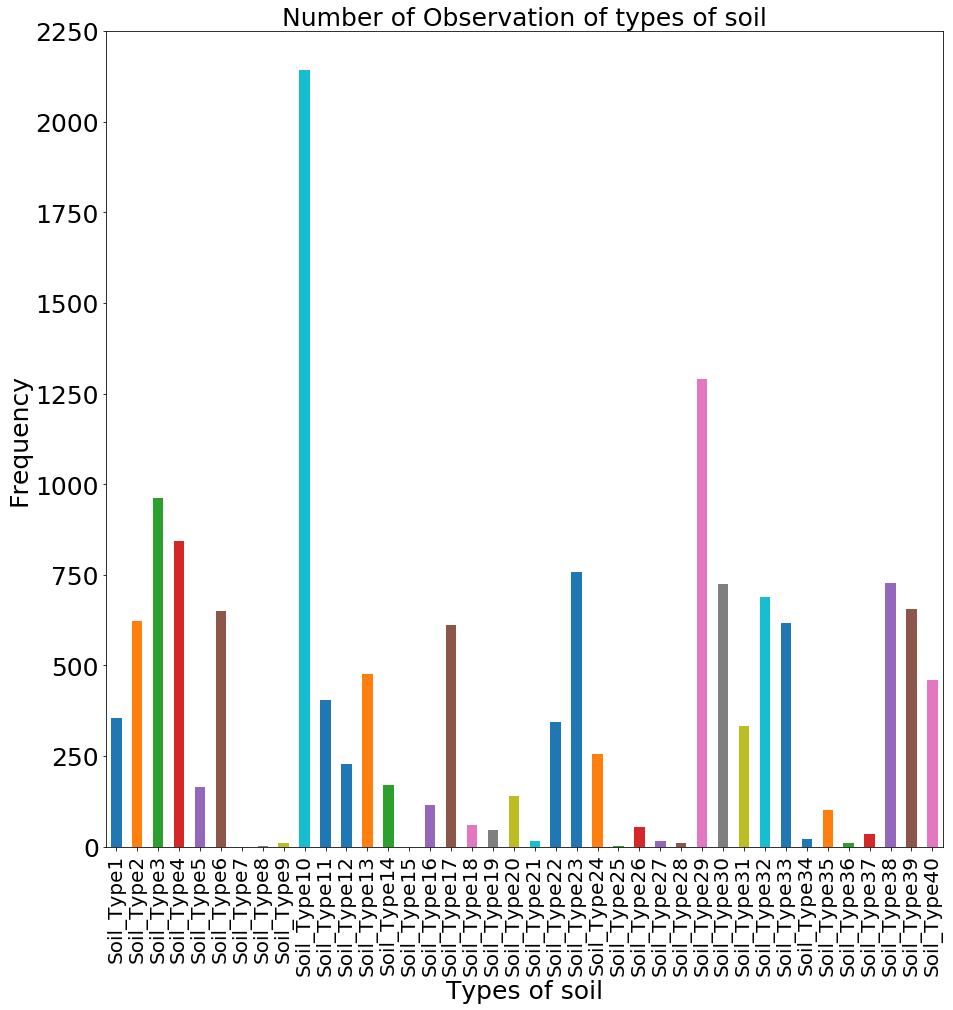

In [12]:
plt.figure(figsize = (15,15))
# Extract the wilderness and soil data into two separate variable
Data_soil = binary_features.iloc[:,4:]
# Create a bar plot
Data_soil.sum().plot(kind='bar')
plt.title("Number of Observation of types of soil", size = 25)
plt.xlabel("Types of soil", size = 25)
plt.ylabel("Frequency", size = 25)
plt.xticks(size = 20)
plt.yticks(size = 25)
plt.show()

### Check for Missing Data in DataSet

In [13]:
# Counting Number of Missing Values in the dataset:-
no_of_missing = data.isnull().sum().sum()
no_of_entries = no_of_features*no_of_observations
percentage_missing = (float(no_of_missing)/no_of_entries)*100.0

print("%f%%  is missing out of  %d enteries in the Data" %(percentage_missing,no_of_entries))

0.000000%  is missing out of  831600 enteries in the Data


## Exploring Target Variable

[INFO] TARGET CLASS:-


Target Class is Cover_Type

Distribution of Target Class:-



,Cover_Type
7,2160
6,2160
5,2160
4,2160
3,2160
2,2160
1,2160



Target Variable i.e Cover_Type ranges from value 1 to 7 and each number is a key which represents names of different forest type!!!



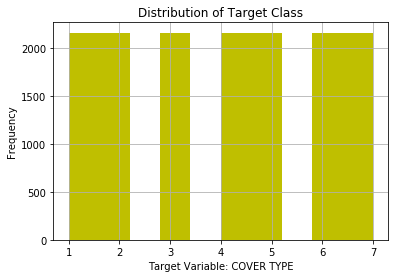

In [14]:
print("[INFO] TARGET CLASS:-\n")
# Save the names of features into a variable
columnNames = data.columns
# Last feature in the data set is the target variable
print("\nTarget Class is",columnNames[-1])
print("\nDistribution of Target Class:-\n")
display(pd.DataFrame(data[columnNames[-1]].value_counts()))
display(data[columnNames[-1]].hist(facecolor='y', histtype = 'barstacked'))
plt.title("Distribution of Target Class")
plt.ylabel("Frequency")
plt.xlabel("Target Variable: COVER TYPE")
print("\nTarget Variable i.e Cover_Type ranges from value 1 to 7 and each number is a key which represents names of different forest type!!!\n")

### Feature Correlation

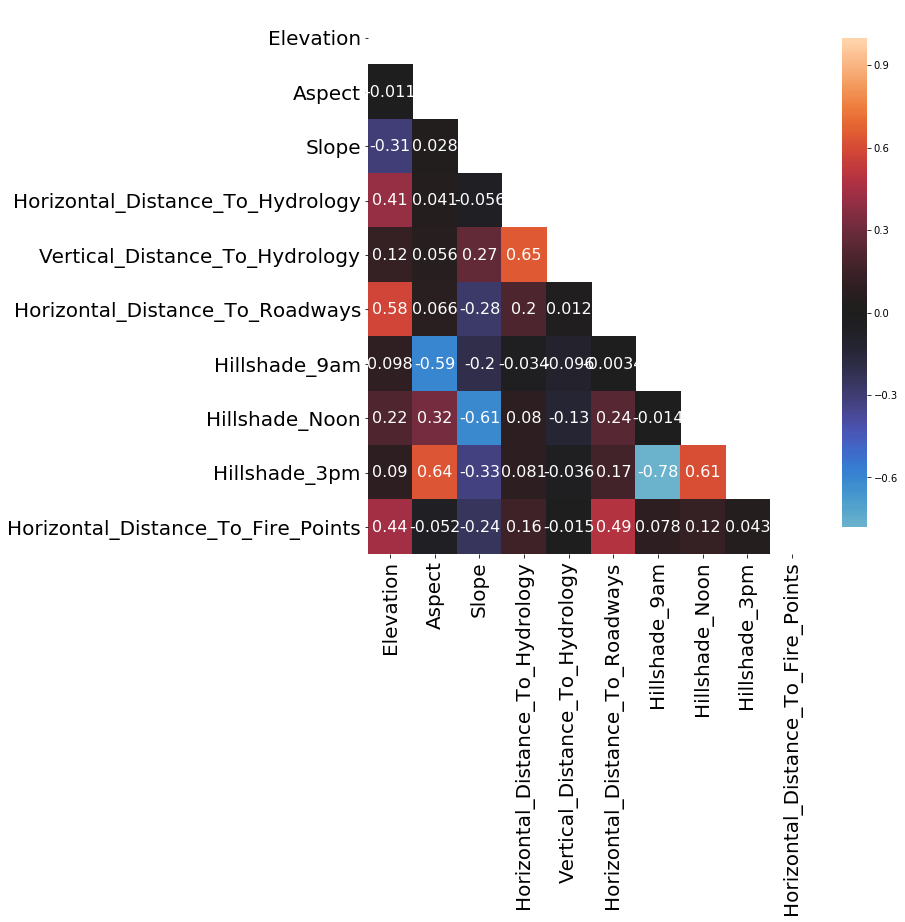

In [15]:
# Plotting Correlation of each numerical feature
plt.subplots(figsize = (10,10))

# Compute the Correlation Matrix: 
numFeature_Correlation = numerical_features.corr()

# Generate a mask for the upper triangle 
mask = np.zeros_like(numFeature_Correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate the heatmap masking the upper triangle
sns.heatmap(numFeature_Correlation,annot = True, center =0, mask = mask, annot_kws={"size": 16}, cbar_kws={"shrink":.9})
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [16]:
print("\nOBSERVATIONS!!!!!!!")
print("\nFeatures that have less or no correlation are colored black while features with positive correlation are colored orange and blue for negative correlation.")


OBSERVATIONS!!!!!!!

Features that have less or no correlation are colored black while features with positive correlation are colored orange and blue for negative correlation.


Hillshade_9am and Hillshade_3pm = -0.78


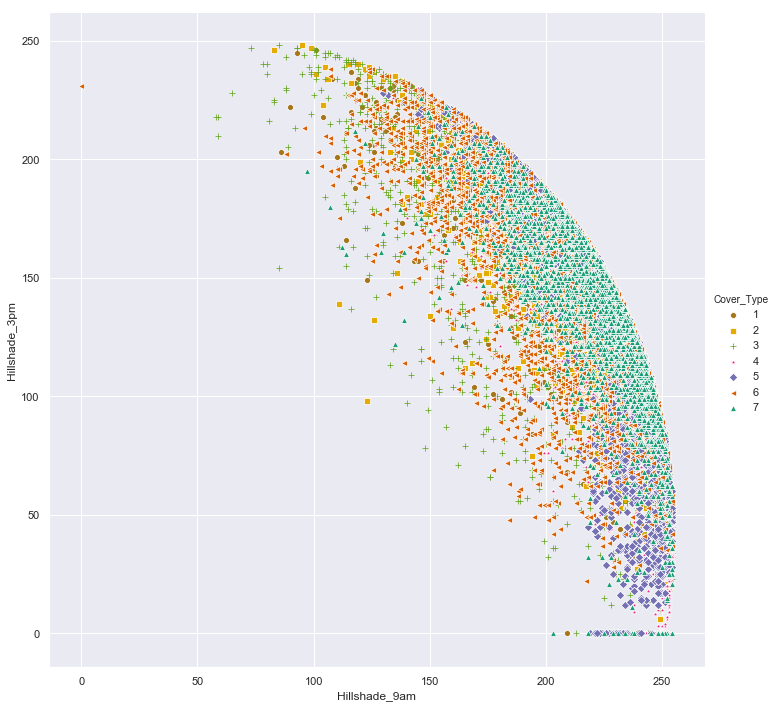

Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65


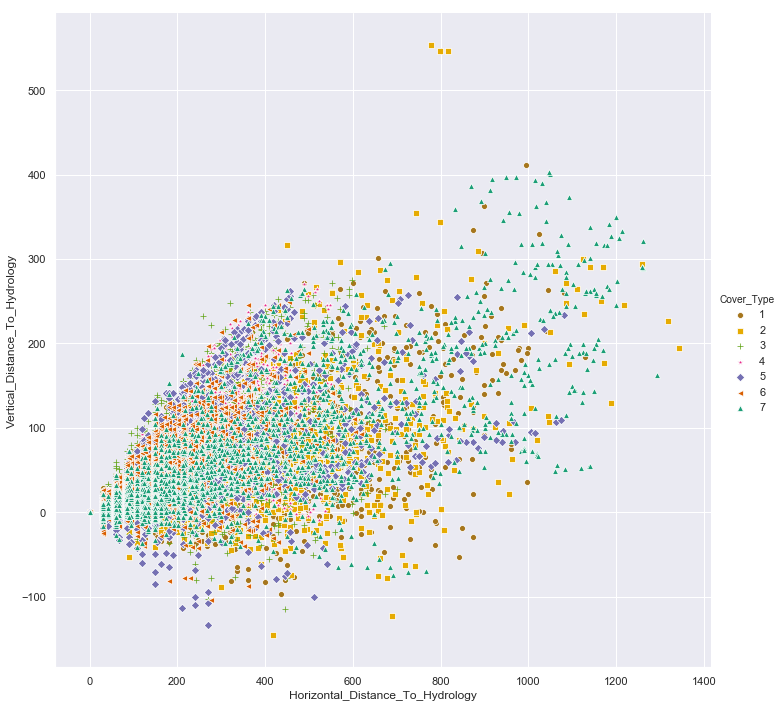

Aspect and Hillshade_3pm = 0.64


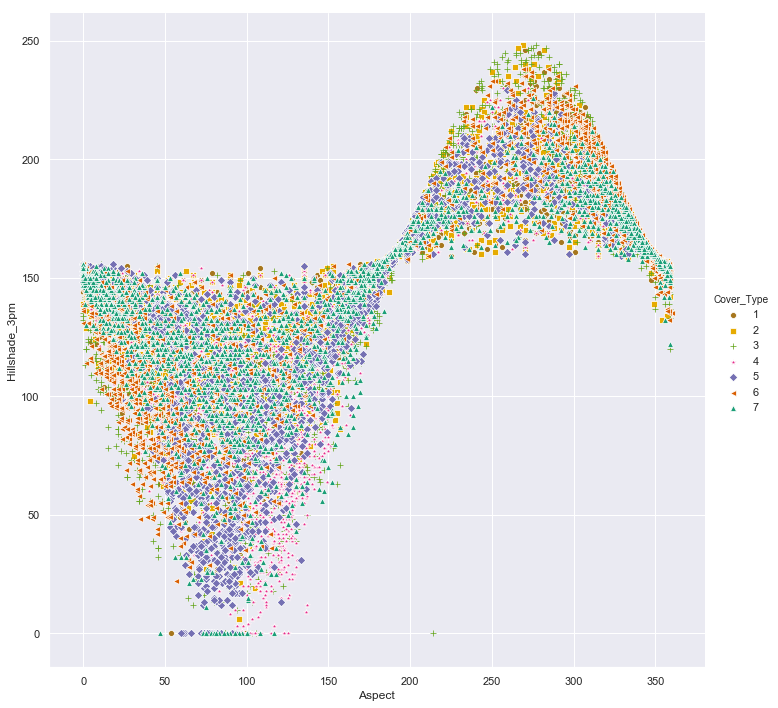

Hillshade_Noon and Hillshade_3pm = 0.61


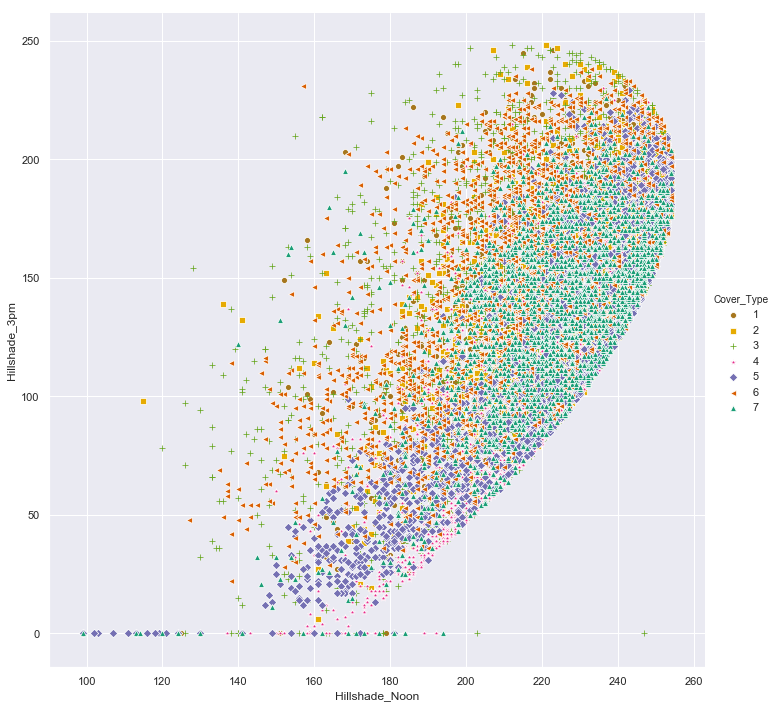

Slope and Hillshade_Noon = -0.61


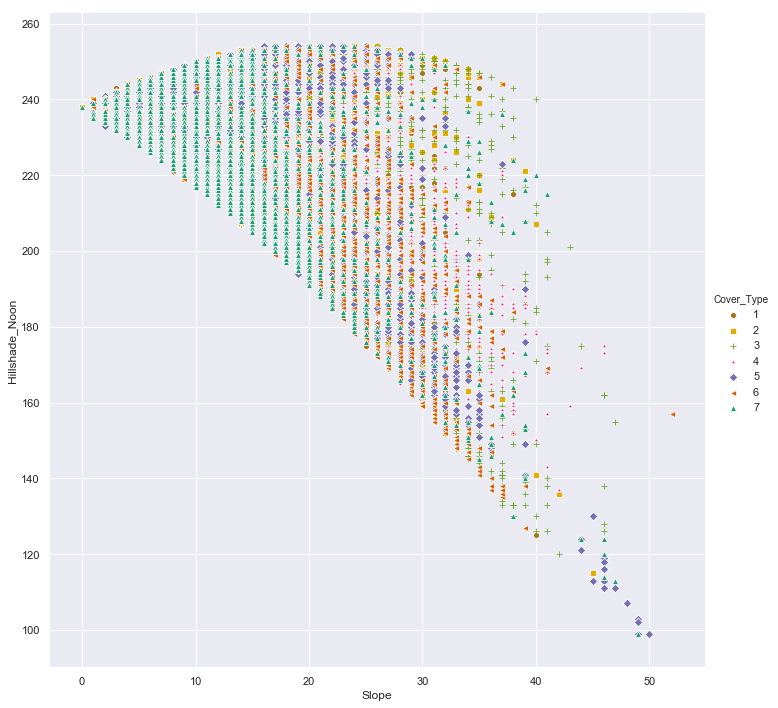

Aspect and Hillshade_9am = -0.59


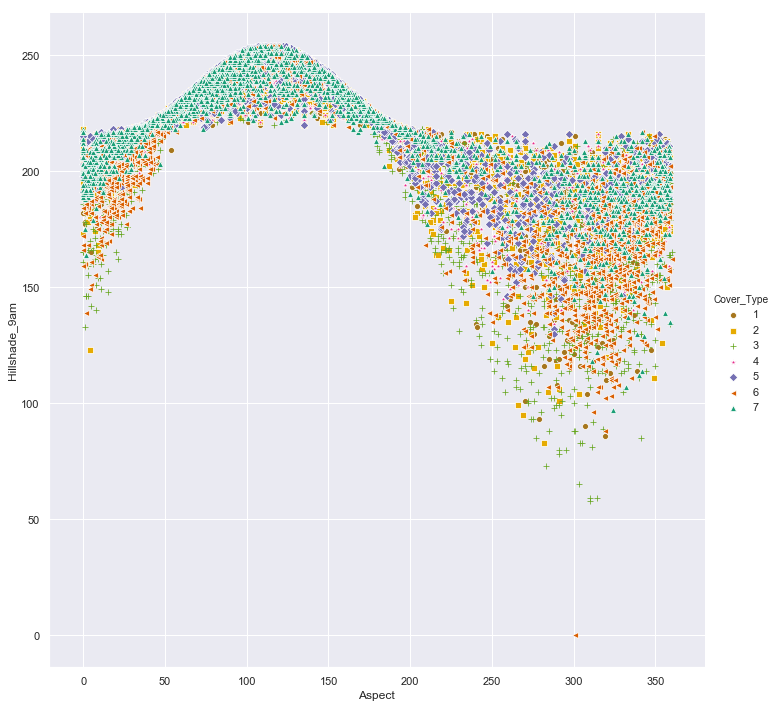

Elevation and Horizontal_Distance_To_Roadways = 0.58


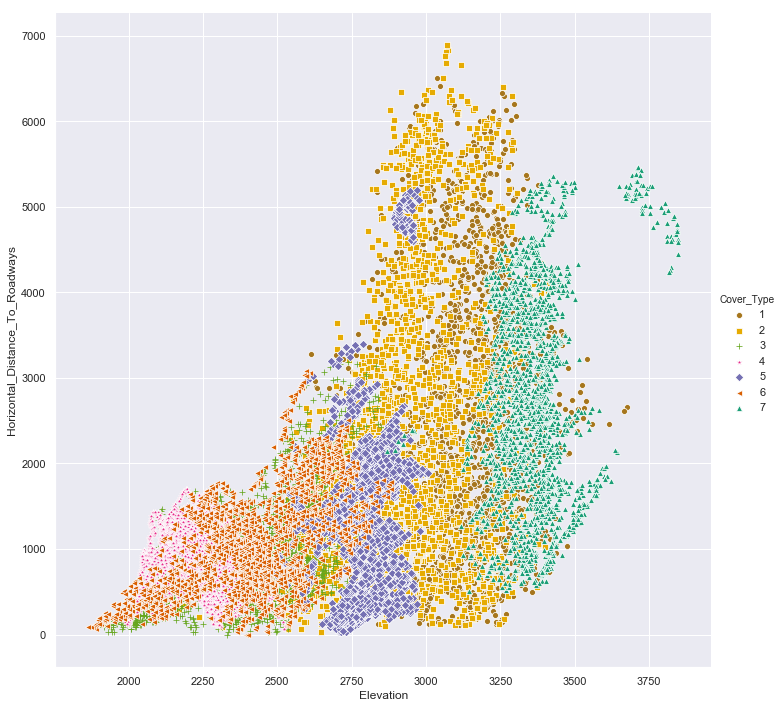

In [17]:
# Scatter plot of all features which have correlation greater than 0.5 with each other
threshold = 0.5
correlationList = []

for i in range(0,10):
    for j in range(i+1,10):
        if(numFeature_Correlation.iloc[i,j]>=threshold and numFeature_Correlation.iloc[i,j]<1) or (numFeature_Correlation.iloc[i,j]<0 and numFeature_Correlation.iloc[i,j]<=-threshold):
            correlationList.append([numFeature_Correlation.iloc[i,j],i,j])

# Sort the correlation list in ascending order
sorted_correlationList = sorted(correlationList,key=lambda x : -abs(x[0]))

# plot the features with high correlation 
for value, x, y in sorted_correlationList:
    
    print ("%s and %s = %.2f" % (columnNames[x],columnNames[y],value))
    sns.set(style="darkgrid")
    sns.pairplot(data,hue="Cover_Type",palette='Dark2_r',markers =["o","s","+","*","D","<","^"] ,size=10,x_vars=columnNames[x],y_vars=columnNames[y] )
    plt.show()

    

### Data Processing !!!!!

### Processing Constant features:-

In [18]:
# Remove the features which are constant as they dont help in prediction
remove_columns = []

print("Shape of data before removing features with constant:",data.shape)
#Add constant columns as they don't help in prediction process
for column in columnNames:
    # if standard deviation is zero
    if data[column].std() == 0: 
        # append the columns to the list
        remove_columns.append(column)

# Dropping the columns with std deviation = 0       
data.drop(remove_columns,axis=1,inplace=True)

print("Removed Columns are:",remove_columns)
print("Shape of data after removing features with constant:",data.shape)

Shape of data before removing features with constant: (15120, 55)
Removed Columns are: ['Soil_Type7', 'Soil_Type15']
Shape of data after removing features with constant: (15120, 53)


### Processing Missing Data

In [19]:
print("Shape of data before removing Missing data:",data.shape)
# Remove observations with missing values
data.dropna()
# Compute shape of data after deleting 
print("Shape of data after removing missing data:",data.shape)

Shape of data before removing Missing data: (15120, 53)
Shape of data after removing missing data: (15120, 53)


### Processing Duplicate Data

In [20]:
print("Shape of data before removing duplicate data:",data.shape)
# Removing duplicate data keeping the first observation
data.drop_duplicates(keep='first')
# Compute the shape of data after deleting duplicate entries
print("Shape of data after removing duplicate data:",data.shape)

Shape of data before removing duplicate data: (15120, 53)
Shape of data after removing duplicate data: (15120, 53)


### Reduce Dimension

In [21]:
print("OBSERVATIONS!!!!!!!!!!\n")
print("Algorithm will run slowly as number of observation and features are large, hence we have to reduce dimension!!!\n")
print("From above observations, every feature has values in each observation, making it difficult to delete any feature!!!\n")
print("Using feature_importance_ in AdaBoost CLassifiers to see which feature has more importance compared to other features!!\n")


OBSERVATIONS!!!!!!!!!!

Algorithm will run slowly as number of observation and features are large, hence we have to reduce dimension!!!

From above observations, every feature has values in each observation, making it difficult to delete any feature!!!

Using feature_importance_ in AdaBoost CLassifiers to see which feature has more importance compared to other features!!



### AdaBoost Classifier

In [22]:
model = AdaBoostClassifier(random_state = 53)
X = data.iloc[:,:-1]
y = data['Cover_Type']
model.fit(X,y)
ADB_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ADB']).sort_values('ADB', ascending=False)
model = None
ADB_feature_importances.head(10)

,ADB
Elevation,0.42
Wilderness_Area4,0.42
Horizontal_Distance_To_Hydrology,0.12
Vertical_Distance_To_Hydrology,0.04
Soil_Type39,0.00
Soil_Type28,0.00
Soil_Type19,0.00
Soil_Type20,0.00
Soil_Type21,0.00
Soil_Type22,0.00


In [23]:
print("OBSERVATIONS!!!!!!!!!\n")
print("Looks like only Elevation, Wilderness_Area4, Horizontal_Distance_To_Hydrology, and Vertical_Distance_To_Hydrology is required to predict classes\n")


OBSERVATIONS!!!!!!!!!

Looks like only Elevation, Wilderness_Area4, Horizontal_Distance_To_Hydrology, and Vertical_Distance_To_Hydrology is required to predict classes



### Reducing DataSet

In [24]:
# Taking sample of data, extracting only those features which are enough to predict

#reduced_Dataset = data[['Elevation','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Aspect','Wilderness_Area4',
#            'Hillshade_Noon','Hillshade_3pm','Hillshade_9am','Slope','Soil_Type22','Soil_Type10','Soil_Type4','Soil_Type34','Soil_Type34','Wilderness_Area3','Soil_Type12',
#            'Soil_Type2','Wilderness_Area1', 'Cover_Type']]

reduced_Dataset = data[['Elevation', 'Wilderness_Area4', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Cover_Type']]


### Train-Test-Split 

In [25]:
# Splitting the Data into 80%-20% train-test respectively:-
# X is the Feature data set
Input = reduced_Dataset.iloc[:,:-1]
# y is the target data set
target = reduced_Dataset['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(Input, target, test_size = 0.20, random_state = 102)

In [26]:
print("[INFO]")
print("\nShape of Input Train Data:",X_train.shape)
print("\nShape of Input Test Data:",X_test.shape)
print("\nShape of Target Train Data:",y_train.shape)
print("\nShape of Target Test Data:",y_test.shape)

[INFO]

Shape of Input Train Data: (12096, 4)

Shape of Input Test Data: (3024, 4)

Shape of Target Train Data: (12096,)

Shape of Target Test Data: (3024,)


### Feature Scaling 

In [27]:
MinMax_Scaler = preprocessing.MinMaxScaler()
scaled_X_Train = MinMax_Scaler.fit_transform(X_train)
print("Shape of Scaled/Normalized Train Data:",scaled_X_Train.shape)

Shape of Scaled/Normalized Train Data: (12096, 4)


In [28]:
scaled_X_Test = MinMax_Scaler.transform(X_test)
print("Shape of Scaled/Normalized Test Data:",scaled_X_Test.shape)

Shape of Scaled/Normalized Test Data: (3024, 4)


### Function to evaluate our model performance

In [29]:
### defining function for training models and measuring its performance 

def evaluate_model(classifier):
    
    # passing classifier to a variable
    classifier = classifier
    
    # records time
    start_time = time.time()
    # classifier learning the model
    classifier = classifier.fit(scaled_X_Train, y_train)
    # records time
    end_time = time.time()
    
    
    # records time
    scoretime_start = time.time()   
    
    # Using 10 K-Fold CV on data, gives peroformance measures
    accuracy  = cross_val_score(classifier, scaled_X_Train, y_train, cv = 10, scoring = 'accuracy')
    f1_score = cross_val_score(classifier, scaled_X_Train, y_train, cv = 10, scoring = 'f1_macro')
   
    # records the time
    scoretime_end = time.time()    
 
    # Computing average mean, taking percent and rounding to two decimal places
    meanAccuracy = np.round(accuracy.mean() * 100, 2)
    f1_mean = np.round(f1_score.mean() * 100, 2)
    
    # time in training
    training_time = np.round((end_time - start_time) / 60, 3)
    # time for evaluating scores
    score_time = np.round((scoretime_end - scoretime_start) / 60, 3)
   
    # Removing traces of classifier
    classifier = None
    print("Classifier Accuracy on training data set = ",meanAccuracy,"% & f1_score = ", f1_mean,"% taking", training_time,"mins to train &", score_time,
          "mins to evaluate the performance!!!!\n")

### AdaBoost Classifier With LogisticRegression as Base_Estimator

In [30]:
# List to store the training accuracy and testing accuracy for number of rounds from 1 to 100:-
training_accuracy_list = []
testing_accuracy_list = []
    
for i in range(1,100):

    classifier = AdaBoostClassifier(n_estimators = i,learning_rate = 0.5, base_estimator = LogisticRegression(),  algorithm="SAMME.R", random_state = 73)

    # Training the model
    trained_model = classifier.fit(scaled_X_Train, y_train)
       
    # Predicting the Test Data
    
    predictions = trained_model.predict(scaled_X_Test)
   
    # calculating Accuracy:-
    
    train_accuracy = accuracy_score(y_train, trained_model.predict(scaled_X_Train))
       
    test_accuracy = accuracy_score(y_test, predictions)
    
    # Compute Confusion Matrix:-
    cMatrix = confusion_matrix(y_test,predictions)
    
    # Compute Classification report:-
    Class_report = metrics.classification_report(y_test, predictions) 
    
    # calculating f1 score
    #f1_score = f1_score(y_test, prediction, average = 'macro')
    #f1_score = np.round(f1_score * 100, 3)
    
    
    # taking precentage and rounding to 3 places
    training_accuracy = np.round(train_accuracy * 100, 3)
    training_accuracy_list.append(training_accuracy)
    
    testing_accuracy = np.round(test_accuracy*100,3)
    testing_accuracy_list.append(testing_accuracy)
    

    #Cleaning the classifiers traces
    classifier = None

    #Print the Results:-
    print("For Number of Rounds = ",i)
    print("\nThe Accuracy Score of AdaBoostClassifier Model on Train Data set is", training_accuracy)
    print("\nThe Accuracy Score of AdaBoostClassifier Model on Test Data set is", testing_accuracy)
    print("\nConfusion Matrix:\n",cMatrix)
    print ("\nClassification Report:\n",Class_report)
    print("--------------------------------------------")

For Number of Rounds =  1

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 28.588

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 28.505

Confusion Matrix:
 [[  0   0   0   0   0   0 417]
 [  0   0   0   5   0   0 398]
 [  0   0   0 280   0   0 182]
 [  0   0   0 443   0   0   0]
 [  0   0   0   0   0   0 450]
 [  0   0   0 248   0   0 182]
 [  0   0   0   0   0   0 419]]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       417
           2       0.00      0.00      0.00       403
           3       0.00      0.00      0.00       462
           4       0.45      1.00      0.62       443
           5       0.00      0.00      0.00       450
           6       0.00      0.00      0.00       430
           7       0.20      1.00      0.34       419

   micro avg       0.29      0.29      0.29      3024
   macro avg       0.09      0.29      0.14      3024
weighted avg      

For Number of Rounds =  9

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 28.588

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 28.505

Confusion Matrix:
 [[  0   0   0   0   0   0 417]
 [  0   0   0   5   0   0 398]
 [  0   0   0 280   0   0 182]
 [  0   0   0 443   0   0   0]
 [  0   0   0   0   0   0 450]
 [  0   0   0 248   0   0 182]
 [  0   0   0   0   0   0 419]]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       417
           2       0.00      0.00      0.00       403
           3       0.00      0.00      0.00       462
           4       0.45      1.00      0.62       443
           5       0.00      0.00      0.00       450
           6       0.00      0.00      0.00       430
           7       0.20      1.00      0.34       419

   micro avg       0.29      0.29      0.29      3024
   macro avg       0.09      0.29      0.14      3024
weighted avg      

For Number of Rounds =  17

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 28.596

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 28.538

Confusion Matrix:
 [[  0   0   0   0   0   0 417]
 [  1   1   0   5   0   0 396]
 [  1  31   0 280   0   0 150]
 [  0   0   0 443   0   0   0]
 [  1   1   0   0   0   0 448]
 [ 12  36   0 248   0   0 134]
 [  0   0   0   0   0   0 419]]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       417
           2       0.01      0.00      0.00       403
           3       0.00      0.00      0.00       462
           4       0.45      1.00      0.62       443
           5       0.00      0.00      0.00       450
           6       0.00      0.00      0.00       430
           7       0.21      1.00      0.35       419

   micro avg       0.29      0.29      0.29      3024
   macro avg       0.10      0.29      0.14      3024
weighted avg     

For Number of Rounds =  25

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 29.39

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 29.431

Confusion Matrix:
 [[  4   0   0   0   0   0 413]
 [  8  24   0   5   0   0 366]
 [ 12 107   0 280   0   0  63]
 [  0   0   0 443   0   0   0]
 [ 36  22   0   0   0   0 392]
 [  8 119   0 248   0   0  55]
 [  0   0   0   0   0   0 419]]

Classification Report:
               precision    recall  f1-score   support

           1       0.06      0.01      0.02       417
           2       0.09      0.06      0.07       403
           3       0.00      0.00      0.00       462
           4       0.45      1.00      0.62       443
           5       0.00      0.00      0.00       450
           6       0.00      0.00      0.00       430
           7       0.25      1.00      0.39       419

   micro avg       0.29      0.29      0.29      3024
   macro avg       0.12      0.30      0.16      3024
weighted avg      

For Number of Rounds =  33

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 31.357

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 31.448

Confusion Matrix:
 [[ 19   6   0   0   0   0 392]
 [ 44  70   0   5   0   0 284]
 [  5 167   0 280   0   0  10]
 [  0   0   0 443   0   0   0]
 [127 107   0   0   0   0 216]
 [  6 166   0 248   0   0  10]
 [  0   0   0   0   0   0 419]]

Classification Report:
               precision    recall  f1-score   support

           1       0.09      0.05      0.06       417
           2       0.14      0.17      0.15       403
           3       0.00      0.00      0.00       462
           4       0.45      1.00      0.62       443
           5       0.00      0.00      0.00       450
           6       0.00      0.00      0.00       430
           7       0.31      1.00      0.48       419

   micro avg       0.31      0.31      0.31      3024
   macro avg       0.14      0.32      0.19      3024
weighted avg     

For Number of Rounds =  41

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 34.673

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 34.358

Confusion Matrix:
 [[ 63  16   0   0   0   0 338]
 [ 77 114   0   5   0   0 207]
 [  0 180   0 280   0   0   2]
 [  0   0   0 443   0   0   0]
 [104 277   0   0   0   0  69]
 [  2 179   0 248   0   0   1]
 [  0   0   0   0   0   0 419]]

Classification Report:
               precision    recall  f1-score   support

           1       0.26      0.15      0.19       417
           2       0.15      0.28      0.20       403
           3       0.00      0.00      0.00       462
           4       0.45      1.00      0.62       443
           5       0.00      0.00      0.00       450
           6       0.00      0.00      0.00       430
           7       0.40      1.00      0.58       419

   micro avg       0.34      0.34      0.34      3024
   macro avg       0.18      0.35      0.23      3024
weighted avg     

For Number of Rounds =  49

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 38.988

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 38.558

Confusion Matrix:
 [[135  30   0   0   0   0 252]
 [ 91 172   0   5   1   0 134]
 [  0 179  12 268   3   0   0]
 [  0   0   1 442   0   0   0]
 [ 47 388   0   0   0   0  15]
 [  0 170   4 244  12   0   0]
 [ 14   0   0   0   0   0 405]]

Classification Report:
               precision    recall  f1-score   support

           1       0.47      0.32      0.38       417
           2       0.18      0.43      0.26       403
           3       0.71      0.03      0.05       462
           4       0.46      1.00      0.63       443
           5       0.00      0.00      0.00       450
           6       0.00      0.00      0.00       430
           7       0.50      0.97      0.66       419

   micro avg       0.39      0.39      0.39      3024
   macro avg       0.33      0.39      0.28      3024
weighted avg     

For Number of Rounds =  57

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 41.278

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 39.616

Confusion Matrix:
 [[176  47   0   0   0   0 194]
 [ 89 229   0   5   2   0  78]
 [  0 163  42 238  19   0   0]
 [  0   0  45 398   0   0   0]
 [ 22 427   0   0   1   0   0]
 [  0 142  31 217  40   0   0]
 [ 67   0   0   0   0   0 352]]

Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.42      0.46       417
           2       0.23      0.57      0.32       403
           3       0.36      0.09      0.14       462
           4       0.46      0.90      0.61       443
           5       0.02      0.00      0.00       450
           6       0.00      0.00      0.00       430
           7       0.56      0.84      0.67       419

   micro avg       0.40      0.40      0.40      3024
   macro avg       0.30      0.40      0.32      3024
weighted avg     

For Number of Rounds =  65

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 41.336

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 39.947

Confusion Matrix:
 [[204  84   0   0   0   0 129]
 [ 78 268   1   4   6   0  46]
 [  0 150  94 186  32   0   0]
 [  0   0  94 349   0   0   0]
 [  5 441   0   0   4   0   0]
 [  0 125  78 170  57   0   0]
 [130   0   0   0   0   0 289]]

Classification Report:
               precision    recall  f1-score   support

           1       0.49      0.49      0.49       417
           2       0.25      0.67      0.36       403
           3       0.35      0.20      0.26       462
           4       0.49      0.79      0.61       443
           5       0.04      0.01      0.01       450
           6       0.00      0.00      0.00       430
           7       0.62      0.69      0.65       419

   micro avg       0.40      0.40      0.40      3024
   macro avg       0.32      0.41      0.34      3024
weighted avg     

For Number of Rounds =  73

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 41.931

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 40.377

Confusion Matrix:
 [[201 119   0   0   0   0  97]
 [ 71 288   3   1  10   1  29]
 [  0 130 152 128  52   0   0]
 [  0   0 129 314   0   0   0]
 [  2 433   0   0  15   0   0]
 [  0 109 132 115  73   1   0]
 [169   0   0   0   0   0 250]]

Classification Report:
               precision    recall  f1-score   support

           1       0.45      0.48      0.47       417
           2       0.27      0.71      0.39       403
           3       0.37      0.33      0.35       462
           4       0.56      0.71      0.63       443
           5       0.10      0.03      0.05       450
           6       0.50      0.00      0.00       430
           7       0.66      0.60      0.63       419

   micro avg       0.40      0.40      0.40      3024
   macro avg       0.42      0.41      0.36      3024
weighted avg     

For Number of Rounds =  81

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 42.171

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 41.104

Confusion Matrix:
 [[197 148   0   0   1   0  71]
 [ 59 311   3   1  13   1  15]
 [  0 115 203  73  67   4   0]
 [  0   0 157 275   0  11   0]
 [  0 421   0   0  29   0   0]
 [  0  94 183  51  88  14   0]
 [203   2   0   0   0   0 214]]

Classification Report:
               precision    recall  f1-score   support

           1       0.43      0.47      0.45       417
           2       0.29      0.77      0.42       403
           3       0.37      0.44      0.40       462
           4       0.69      0.62      0.65       443
           5       0.15      0.06      0.09       450
           6       0.47      0.03      0.06       430
           7       0.71      0.51      0.60       419

   micro avg       0.41      0.41      0.41      3024
   macro avg       0.44      0.42      0.38      3024
weighted avg     

For Number of Rounds =  89

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 40.468

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 39.881

Confusion Matrix:
 [[182 179   0   0   3   0  53]
 [ 47 328   3   1  16   1   7]
 [  0 107 225  39  75  16   0]
 [  0   0 182 208   0  53   0]
 [  0 407   0   0  43   0   0]
 [  0  81 197  18 101  33   0]
 [228   4   0   0   0   0 187]]

Classification Report:
               precision    recall  f1-score   support

           1       0.40      0.44      0.42       417
           2       0.30      0.81      0.43       403
           3       0.37      0.49      0.42       462
           4       0.78      0.47      0.59       443
           5       0.18      0.10      0.13       450
           6       0.32      0.08      0.12       430
           7       0.76      0.45      0.56       419

   micro avg       0.40      0.40      0.40      3024
   macro avg       0.44      0.40      0.38      3024
weighted avg     

For Number of Rounds =  97

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 37.979

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 37.599

Confusion Matrix:
 [[159 217   0   0   4   0  37]
 [ 35 338   4   0  21   1   4]
 [  0  94 236  19  88  25   0]
 [  0   0 193 129   0 121   0]
 [  0 384   0   0  66   0   0]
 [  0  73 193  14 109  41   0]
 [243   8   0   0   0   0 168]]

Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.38      0.37       417
           2       0.30      0.84      0.45       403
           3       0.38      0.51      0.43       462
           4       0.80      0.29      0.43       443
           5       0.23      0.15      0.18       450
           6       0.22      0.10      0.13       430
           7       0.80      0.40      0.54       419

   micro avg       0.38      0.38      0.38      3024
   macro avg       0.44      0.38      0.36      3024
weighted avg     

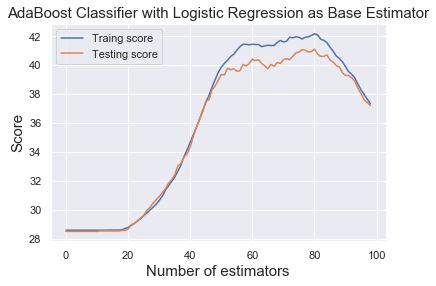

In [31]:
#Plot the performance of Adaboost with Logistic regression:-
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
number_of_estimator = range(0,99)
ax.plot(list(number_of_estimator),training_accuracy_list,label="Traing score")
ax.plot(list(number_of_estimator),testing_accuracy_list,label="Testing score")
ax.set_xlabel("Number of estimators",size=15)
ax.set_ylabel("Score",size=15)
ax.legend(loc="best")
ax.set_title("AdaBoost Classifier with Logistic Regression as Base Estimator",size=15)
plt.show() 

### AdaBoost Classifier with GaussianNB as base_estimator 

In [32]:
# List to store the training accuracy and testing accuracy for number of rounds from 1 to 100:-
training_accuracy_list = []
testing_accuracy_list = []
    
for i in range(1,100):

    classifier = AdaBoostClassifier(n_estimators = i,learning_rate = 0.5, base_estimator=GaussianNB(),  algorithm="SAMME.R", random_state = 101)

    # Training the model
    trained_model = classifier.fit(scaled_X_Train, y_train)
       
    # Predicting the Test Data
    
    predictions = trained_model.predict(scaled_X_Test)
   
    # calculating Accuracy:-
    
    train_accuracy = accuracy_score(y_train, trained_model.predict(scaled_X_Train))
       
    test_accuracy = accuracy_score(y_test, predictions)
    
    # Compute Confusion Matrix:-
    cMatrix = confusion_matrix(y_test,predictions)
    
    # Compute Classification report:-
    Class_report = metrics.classification_report(y_test, predictions) 
    
    # calculating f1 score
    #f1_score = f1_score(y_test, prediction, average = 'macro')
    #f1_score = np.round(f1_score * 100, 3)
    
    
    # taking precentage and rounding to 3 places
    training_accuracy = np.round(train_accuracy * 100, 3)
    training_accuracy_list.append(training_accuracy)
    
    testing_accuracy = np.round(test_accuracy*100,3)
    testing_accuracy_list.append(testing_accuracy)
    

    #Cleaning the classifiers traces
    classifier = None

    #Print the Results:-
    print("For Number of Rounds = ",i)
    print("\nThe Accuracy Score of AdaBoostClassifier Model on Train Data set is", training_accuracy)
    print("\nThe Accuracy Score of AdaBoostClassifier Model on Test Data set is", testing_accuracy)
    print("\nConfusion Matrix:\n",cMatrix)
    print ("\nClassification Report:\n",Class_report)
    print("--------------------------------------------")

For Number of Rounds =  1

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 49.14

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 49.702

Confusion Matrix:
 [[281   0   0   0  50   0  86]
 [177   0   0   5 203   0  18]
 [  0   0   0 280 181   1   0]
 [  0   0   0 443   0   0   0]
 [ 22   0   0   0 427   0   1]
 [  0   0   0 248 182   0   0]
 [ 67   0   0   0   0   0 352]]

Classification Report:
               precision    recall  f1-score   support

           1       0.51      0.67      0.58       417
           2       0.00      0.00      0.00       403
           3       0.00      0.00      0.00       462
           4       0.45      1.00      0.62       443
           5       0.41      0.95      0.57       450
           6       0.00      0.00      0.00       430
           7       0.77      0.84      0.80       419

   micro avg       0.50      0.50      0.50      3024
   macro avg       0.31      0.49      0.37      3024
weighted avg       

For Number of Rounds =  9

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 32.275

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 32.275

Confusion Matrix:
 [[415   0   0   0   0   0   2]
 [366   0   1   5   2  27   2]
 [ 98   1   9 280   3  71   0]
 [  0   0   0 443   0   0   0]
 [415   0   6   0  10  18   1]
 [ 70   0   7 248   6  99   0]
 [419   0   0   0   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.23      1.00      0.38       417
           2       0.00      0.00      0.00       403
           3       0.39      0.02      0.04       462
           4       0.45      1.00      0.62       443
           5       0.48      0.02      0.04       450
           6       0.46      0.23      0.31       430
           7       0.00      0.00      0.00       419

   micro avg       0.32      0.32      0.32      3024
   macro avg       0.29      0.32      0.20      3024
weighted avg      

For Number of Rounds =  17

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 37.351

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 37.665

Confusion Matrix:
 [[383   2   0   0  25   7   0]
 [239  13   0   5 130  15   1]
 [ 33   9   1 280 129  10   0]
 [  0   0   0 443   0   0   0]
 [ 82  13   2   0 283  70   0]
 [ 13  13   0 248 140  16   0]
 [419   0   0   0   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.92      0.48       417
           2       0.26      0.03      0.06       403
           3       0.33      0.00      0.00       462
           4       0.45      1.00      0.62       443
           5       0.40      0.63      0.49       450
           6       0.14      0.04      0.06       430
           7       0.00      0.00      0.00       419

   micro avg       0.38      0.38      0.38      3024
   macro avg       0.27      0.37      0.25      3024
weighted avg     

For Number of Rounds =  25

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 45.651

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 45.503

Confusion Matrix:
 [[230   0   0   0  23   1 163]
 [223   3   0   5 137   1  34]
 [ 49   5   2 280 122   4   0]
 [  0   0   0 443   0   0   0]
 [104   1   6   0 312  27   0]
 [ 18   4   4 248 153   3   0]
 [ 35   1   0   0   0   0 383]]

Classification Report:
               precision    recall  f1-score   support

           1       0.35      0.55      0.43       417
           2       0.21      0.01      0.01       403
           3       0.17      0.00      0.01       462
           4       0.45      1.00      0.62       443
           5       0.42      0.69      0.52       450
           6       0.08      0.01      0.01       430
           7       0.66      0.91      0.77       419

   micro avg       0.46      0.46      0.46      3024
   macro avg       0.34      0.45      0.34      3024
weighted avg     

For Number of Rounds =  33

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 31.936

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 32.573

Confusion Matrix:
 [[ 88  87   0   0 154   0  88]
 [ 71  69   0   5 245   0  13]
 [ 14  50   0 280 118   0   0]
 [  0   0   0 443   0   0   0]
 [ 85  92   0   0 273   0   0]
 [ 15  45   0 248 122   0   0]
 [ 44 260   0   0   3   0 112]]

Classification Report:
               precision    recall  f1-score   support

           1       0.28      0.21      0.24       417
           2       0.11      0.17      0.14       403
           3       0.00      0.00      0.00       462
           4       0.45      1.00      0.62       443
           5       0.30      0.61      0.40       450
           6       0.00      0.00      0.00       430
           7       0.53      0.27      0.35       419

   micro avg       0.33      0.33      0.33      3024
   macro avg       0.24      0.32      0.25      3024
weighted avg     

For Number of Rounds =  41

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 35.532

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 36.31

Confusion Matrix:
 [[363   8   1   0   5   0  40]
 [281  38   9   5  66   0   4]
 [ 19  98  35 280  30   0   0]
 [  0   0   0 443   0   0   0]
 [183 103  11   0 153   0   0]
 [ 19  81  21 248  61   0   0]
 [303  50   0   0   0   0  66]]

Classification Report:
               precision    recall  f1-score   support

           1       0.31      0.87      0.46       417
           2       0.10      0.09      0.10       403
           3       0.45      0.08      0.13       462
           4       0.45      1.00      0.62       443
           5       0.49      0.34      0.40       450
           6       0.00      0.00      0.00       430
           7       0.60      0.16      0.25       419

   micro avg       0.36      0.36      0.36      3024
   macro avg       0.34      0.36      0.28      3024
weighted avg      

For Number of Rounds =  49

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 39.592

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 40.575

Confusion Matrix:
 [[242  17   1   0  44   1 112]
 [176  20  26   5 142   6  28]
 [  2  52  76 280  50   2   0]
 [  0   0   0 443   0   0   0]
 [ 43  34  23   0 320  30   0]
 [  0  45  64 248  72   1   0]
 [169 125   0   0   0   0 125]]

Classification Report:
               precision    recall  f1-score   support

           1       0.38      0.58      0.46       417
           2       0.07      0.05      0.06       403
           3       0.40      0.16      0.23       462
           4       0.45      1.00      0.62       443
           5       0.51      0.71      0.59       450
           6       0.03      0.00      0.00       430
           7       0.47      0.30      0.37       419

   micro avg       0.41      0.41      0.41      3024
   macro avg       0.33      0.40      0.33      3024
weighted avg     

For Number of Rounds =  57

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 34.35

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 35.516

Confusion Matrix:
 [[268  56   0   0  11   5  77]
 [235  15  22   5  75  38  13]
 [ 10  16  75 274  20  67   0]
 [  0   0   0 443   0   0   0]
 [175   0  18   0 157 100   0]
 [ 14  30  64 248  13  61   0]
 [172 192   0   0   0   0  55]]

Classification Report:
               precision    recall  f1-score   support

           1       0.31      0.64      0.42       417
           2       0.05      0.04      0.04       403
           3       0.42      0.16      0.23       462
           4       0.46      1.00      0.63       443
           5       0.57      0.35      0.43       450
           6       0.23      0.14      0.17       430
           7       0.38      0.13      0.20       419

   micro avg       0.36      0.36      0.36      3024
   macro avg       0.34      0.35      0.30      3024
weighted avg      

For Number of Rounds =  65

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 40.526

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 41.336

Confusion Matrix:
 [[174  67   1   0  33   2 140]
 [133  41  29   4 159   5  32]
 [  0  31 115 261  52   3   0]
 [  0   0   1 442   0   0   0]
 [ 55  22  30   0 309  33   1]
 [  1  38  69 240  76   6   0]
 [135 121   0   0   0   0 163]]

Classification Report:
               precision    recall  f1-score   support

           1       0.35      0.42      0.38       417
           2       0.13      0.10      0.11       403
           3       0.47      0.25      0.33       462
           4       0.47      1.00      0.64       443
           5       0.49      0.69      0.57       450
           6       0.12      0.01      0.03       430
           7       0.49      0.39      0.43       419

   micro avg       0.41      0.41      0.41      3024
   macro avg       0.36      0.41      0.35      3024
weighted avg     

For Number of Rounds =  73

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 36.963

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 37.169

Confusion Matrix:
 [[358   3   0   0  14   4  38]
 [264   7   2   4  77  42   7]
 [ 16  66  23 261  14  82   0]
 [  0   0   1 442   0   0   0]
 [151  19   6   0 172 102   0]
 [ 31  56  10 240  14  79   0]
 [331  45   0   0   0   0  43]]

Classification Report:
               precision    recall  f1-score   support

           1       0.31      0.86      0.46       417
           2       0.04      0.02      0.02       403
           3       0.55      0.05      0.09       462
           4       0.47      1.00      0.64       443
           5       0.59      0.38      0.46       450
           6       0.26      0.18      0.21       430
           7       0.49      0.10      0.17       419

   micro avg       0.37      0.37      0.37      3024
   macro avg       0.39      0.37      0.29      3024
weighted avg     

For Number of Rounds =  81

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 38.583

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 38.558

Confusion Matrix:
 [[376  19   0   0  13   5   4]
 [266   7   3   4  63  60   0]
 [  8  25  33 258  13 125   0]
 [  0   0   2 441   0   0   0]
 [131   5   5   0 185 124   0]
 [  7  36  11 239  16 121   0]
 [247 169   0   0   0   0   3]]

Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.90      0.52       417
           2       0.03      0.02      0.02       403
           3       0.61      0.07      0.13       462
           4       0.47      1.00      0.64       443
           5       0.64      0.41      0.50       450
           6       0.28      0.28      0.28       430
           7       0.43      0.01      0.01       419

   micro avg       0.39      0.39      0.39      3024
   macro avg       0.40      0.38      0.30      3024
weighted avg     

For Number of Rounds =  89

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 34.921

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 34.888

Confusion Matrix:
 [[233  73   0   0  13   7  91]
 [214  18   3   5  59  80  24]
 [  5  32  10 271  16 128   0]
 [  0   0   0 443   0   0   0]
 [ 99   7   2   0 161 180   1]
 [  3  44   4 244  14 121   0]
 [ 65 285   0   0   0   0  69]]

Classification Report:
               precision    recall  f1-score   support

           1       0.38      0.56      0.45       417
           2       0.04      0.04      0.04       403
           3       0.53      0.02      0.04       462
           4       0.46      1.00      0.63       443
           5       0.61      0.36      0.45       450
           6       0.23      0.28      0.26       430
           7       0.37      0.16      0.23       419

   micro avg       0.35      0.35      0.35      3024
   macro avg       0.37      0.35      0.30      3024
weighted avg     

For Number of Rounds =  97

The Accuracy Score of AdaBoostClassifier Model on Train Data set is 34.987

The Accuracy Score of AdaBoostClassifier Model on Test Data set is 34.689

Confusion Matrix:
 [[286  97   0   0  13   5  16]
 [238  28   3   5  52  74   3]
 [  3  42   7 276  15 119   0]
 [  0   0   0 443   0   0   0]
 [120  17   9   0 154 150   0]
 [  4  46   2 248  15 115   0]
 [ 61 342   0   0   0   0  16]]

Classification Report:
               precision    recall  f1-score   support

           1       0.40      0.69      0.51       417
           2       0.05      0.07      0.06       403
           3       0.33      0.02      0.03       462
           4       0.46      1.00      0.63       443
           5       0.62      0.34      0.44       450
           6       0.25      0.27      0.26       430
           7       0.46      0.04      0.07       419

   micro avg       0.35      0.35      0.35      3024
   macro avg       0.37      0.35      0.28      3024
weighted avg     

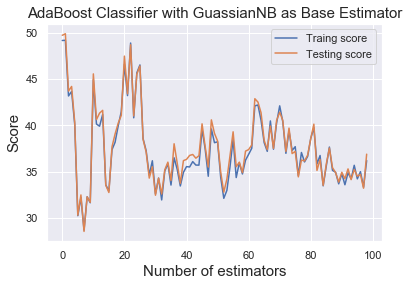

In [33]:
#Plot the performance of Adaboost with GuassianNB:-
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
number_of_estimator = range(0,99)
ax.plot(list(number_of_estimator),training_accuracy_list,label="Traing score")
ax.plot(list(number_of_estimator),testing_accuracy_list,label="Testing score")
ax.set_xlabel("Number of estimators",size=15)
ax.set_ylabel("Score",size=15)
ax.legend(loc="best")
ax.set_title("AdaBoost Classifier with GuassianNB as Base Estimator",size=15)
plt.show() 

### Performance with K- Nearest Neighbor alone

In [34]:
# Performing KNN on the data set:-
evaluate_model(KNeighborsClassifier(n_neighbors = 5, n_jobs=-1))

Classifier Accuracy on training data set =  62.2 % & f1_score =  61.59 % taking 0.003 mins to train & 0.016 mins to evaluate the performance!!!!



### Performance with Logistic Regression alone

In [35]:
# Performing Logistic Regression on the data set:- 
evaluate_model(LogisticRegression(max_iter = 100, verbose = 0, n_jobs = -1, class_weight = None, tol = 0.0001,random_state = 101))

Classifier Accuracy on training data set =  50.5 % & f1_score =  43.98 % taking 0.002 mins to train & 0.044 mins to evaluate the performance!!!!



### Performance with Stochastic Gradient Descent alone

In [36]:
evaluate_model(SGDClassifier(n_jobs=-1, random_state = 101))

Classifier Accuracy on training data set =  42.79 % & f1_score =  32.78 % taking 0.004 mins to train & 0.014 mins to evaluate the performance!!!!



### Performance with GuassianNB alone

In [37]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
evaluate_model(clf)

Classifier Accuracy on training data set =  49.09 % & f1_score =  36.44 % taking 0.0 mins to train & 0.004 mins to evaluate the performance!!!!



### Read the Data with no labels

In [38]:
# Read the dataset using pandas pd.read_csv and display the first two rows
data_no_labels = pd.read_csv('judge-no-labels.csv')
pd.set_option('display.max_columns', None)
display(data_no_labels.head(2))

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# Extract the column ID
Id = data_no_labels['Id']
Id = pd.DataFrame(Id, columns = ['Id'])

In [40]:
# Drop the column 'Id'
data_no_labels = data_no_labels.drop(['Id'],1)
print("\n[INFO]:\n")
print("\nDimensions of the dataset is:",data_no_labels.shape)
display(data_no_labels.head(1))
no_of_observations, no_of_features = data_no_labels.shape
print("\nDatatypes of Features:\n\n",data_no_labels.dtypes)


[INFO]:


Dimensions of the dataset is: (565892, 54)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0



Datatypes of Features:

 Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_T

In [41]:
# Compute Skew of each feature of the data set with no labels
print(data_no_labels.skew())

Elevation                              -0.816594
Aspect                                  0.401424
Slope                                   0.794105
Horizontal_Distance_To_Hydrology        1.133163
Vertical_Distance_To_Hydrology          1.797687
Horizontal_Distance_To_Roadways         0.701911
Hillshade_9am                          -1.184138
Hillshade_Noon                         -1.062230
Hillshade_3pm                          -0.266622
Horizontal_Distance_To_Fire_Points      1.281245
Wilderness_Area1                        0.182751
Wilderness_Area2                        4.038900
Wilderness_Area3                        0.256051
Wilderness_Area4                        3.818936
Soil_Type1                             14.438671
Soil_Type2                              8.888326
Soil_Type3                             11.982229
Soil_Type4                              6.782576
Soil_Type5                             19.803550
Soil_Type6                              9.618746
Soil_Type7          

In [42]:
# Counting Number of Missing Values in the dataset with no labels:-
no_of_missing = data_no_labels.isnull().sum().sum()
no_of_entries = no_of_features*no_of_observations
percentage_missing = (float(no_of_missing)/no_of_entries)*100.0

print("%f%%  is missing out of  %d enteries in the Dataset with no labels:" %(percentage_missing,no_of_entries))

0.000000%  is missing out of  30558168 enteries in the Dataset with no labels:


In [43]:
# Remove the features which are constant as they dont help in prediction
remove_columns = []

columnNames = data_no_labels.columns
print("Shape of data before removing features with constant:",data_no_labels.shape)
#Add constant columns as they don't help in prediction process
for column in columnNames:
    # if standard deviation is zero
    if data_no_labels[column].std() == 0: 
        # append the columns to the list
        remove_columns.append(column)

# Dropping the columns with std deviation = 0       
data_no_labels.drop(remove_columns,axis=1,inplace=True)

print("Removed Columns are:",remove_columns)
print("Shape of data after removing features with constant:",data_no_labels.shape)

Shape of data before removing features with constant: (565892, 54)
Removed Columns are: []
Shape of data after removing features with constant: (565892, 54)


In [44]:
# Normalizing the entire dataset which had labels removing the labels 
data = pd.read_csv('dataset.csv', index_col = 'Id')
scaled_data = MinMax_Scaler.fit_transform(data.iloc[:,:-1])
print("Shape of Scaled/Normalized Train Data:",scaled_data.shape)
print("Train Data:\n",scaled_data)

Shape of Scaled/Normalized Train Data: (15120, 54)
Train Data:
 [[0.36908359 0.14166667 0.05769231 ... 0.         0.         0.        ]
 [0.36606244 0.15555556 0.03846154 ... 0.         0.         0.        ]
 [0.47381672 0.38611111 0.17307692 ... 0.         0.         0.        ]
 ...
 [0.31671702 0.37222222 0.48076923 ... 0.         0.         0.        ]
 [0.3141994  0.46388889 0.53846154 ... 0.         0.         0.        ]
 [0.3081571  0.54722222 0.65384615 ... 0.         0.         0.        ]]


In [45]:
# Normalizing the dataset with no labels
scaled_data_no_labels = MinMax_Scaler.fit_transform(data_no_labels)
print("Shape of Scaled/Normalized Test Data with no Labels:",scaled_data_no_labels.shape)

Shape of Scaled/Normalized Test Data with no Labels: (565892, 54)


In [46]:
print("Test Data:- Data with no labels after normalizing\n",scaled_data_no_labels)

Test Data:- Data with no labels after normalizing
 [[0.41070535 0.98333333 0.21212121 ... 0.         0.         0.        ]
 [0.4122061  0.         0.1969697  ... 0.         0.         0.        ]
 [0.42721361 0.04444444 0.22727273 ... 0.         0.         0.        ]
 ...
 [0.26363182 0.44166667 0.25757576 ... 0.         0.         0.        ]
 [0.26263132 0.47222222 0.22727273 ... 0.         0.         0.        ]
 [0.26213107 0.45833333 0.1969697  ... 0.         0.         0.        ]]


In [47]:
# Using the AdaBoost Classifier with Logistic Regression as base_estimator 
classifier = AdaBoostClassifier(n_estimators = 100,learning_rate = 0.5, base_estimator = LogisticRegression(),  algorithm="SAMME.R", random_state = 73)

# Training the model on the previous data
trained_model = classifier.fit(scaled_data, data.iloc[:,-1])
       
# Predict the Cover_Type with the Test Data ( dataset with no labels)
    
predictions = trained_model.predict(scaled_data_no_labels)

#Cleaning the classifiers traces
classifier = None


In [48]:
print("Predicted Cover_Type using Adaboost Classifier with logistic regression and n_estimator = 100:\n", predictions)

Predicted Cover_Type using Adaboost Classifier with logistic regression and n_estimator = 100:
 [2 2 2 ... 5 5 5]


In [49]:
# Creating a Data Frame for submitting result to kaggle:-
predictions = pd.DataFrame(predictions, columns =['Cover_Type'])
predictions.reset_index(drop=True,inplace=True)
Id.reset_index(drop=True,inplace=True)
final_result = pd.concat([Id,predictions],axis=1)
final_result.head()

,Id,Cover_Type
0,15121,2
1,15122,2
2,15123,2
3,15124,2
4,15125,2


In [50]:
# Copying the result to csv file -> judge-predictions.csv
submission = pd.DataFrame(final_result).to_csv('judge-predictions.csv', index = False)

In [51]:
# Using the AdaBoost Classifier with Logistic Regression as base_estimator 
classifier = AdaBoostClassifier(n_estimators = 500,learning_rate = 1.5, base_estimator = LogisticRegression(),  algorithm="SAMME.R", random_state = 101)

# Training the model on the previous data
trained_model = classifier.fit(scaled_data, data.iloc[:,-1])
       
# Predict the Cover_Type with the Test Data ( dataset with no labels)
    
predictions = trained_model.predict(scaled_data_no_labels)

#Cleaning the classifiers traces
classifier = None


In [52]:
print("Predicted Cover_Type using Adaboost Classifier with logistic regression and n_estimator = 500:\n", predictions)

Predicted Cover_Type using Adaboost Classifier with logistic regression and n_estimator = 500:
 [2 1 1 ... 3 3 3]


In [53]:
# Creating a Data Frame for submitting result to kaggle:-
predictions = pd.DataFrame(predictions, columns =['Cover_Type'])
predictions.reset_index(drop=True,inplace=True)
Id.reset_index(drop=True,inplace=True)
final_result = pd.concat([Id,predictions],axis=1)
final_result.head()



,Id,Cover_Type
0,15121,2
1,15122,1
2,15123,1
3,15124,1
4,15125,1


In [54]:
# Copying the result to csv file -> judge-predictions.csv
submission = pd.DataFrame(final_result).to_csv('judge-predictions.csv', index = False)

### AdaBoost Classifier From Scratch

In [90]:
# Function to compute error
def computeError(predicted, target):
    return sum(predicted!= target) / float(len(target))

In [56]:
def clf_fn(trainY,trainX,testY,testX,classifier):
    classifier.fit(trainX,trainY)
    train_Prediction = clf.predict(trainX)
    test_Prediction = clf.predict(testX)
    return computeError(train_Prediction, trainY), computeError(test_Prediction, testY)

In [85]:
def classifier_adaBoost(trainY, trainX, testY, testX, N, classifier):
    
    trainLength = len(trainX)
    testLength = len(testX)
    
    # Initialize Weights
    weight = np.ones(trainLength)/trainLength
    
    tr_Prediction, te_Prediction = [np.zeros(trainLength), np.zeros(testLength)]
    
    for index in range(N):
        
        classifier.fit(trainX, trainY, sample_weight = weight)
        
        predicted_train_i = classifier.predict(trainX)
        predicted_test_i = classifier.predict(testX)

        incorrect = [int(p) for p in (predicted_train_i != trainY)]
        
        # Equivalent with 1/-1 to update weights
        incorrect2 = [p if p==1 else -1 for p in incorrect]
        
        # Estimated Error
        error_estimated = np.dot(weight, incorrect) / sum(weight)
        
        # Alpha
        alpha_N = 0.5 * np.log( (1 - error_estimated) / float(error_estimated))
        
        # Update Weights
        weight = np.multiply(weight, np.exp([float(p) * alpha_N for p in incorrect2]))
        
        # predictions
        tr_Prediction = [sum(p) for p in zip(tr_Prediction, 
                                          [p * alpha_N for p in predicted_train_i])]
        te_Prediction = [sum(p) for p in zip(te_Prediction, 
                                         [p * alpha_N for p in predicted_test_i])]
    
     
    tr_Prediction, te_Prediction = np.sign(tr_Prediction), np.sign(te_Prediction)
    
     # Return error rate in train and test set
    return computeError(tr_Prediction , trainY), computeError(te_Prediction , testY)
    #return tr_Prediction, te_Prediction   

In [92]:
# Function to plot the graph
def plot(trainError, testError):
    
    dframe_Error = pd.DataFrame([trainError, testError]).T
    dframe_Error.columns = ['Training', 'Test']
    dframe_Error.plot()
    plt.xlabel('Number of iterations', fontsize = 12)
    plt.ylabel('Error rate', fontsize = 12)
    plt.title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=testError[0])
